# Introducción al Aprendizaje Automatizado: Trabajo Práctico N° 3
## Natalia Mellino

In [1]:
# imports
from sklearn.naive_bayes import GaussianNB
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.metrics import accuracy_score
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import pickle

from ej4tp1 import ej4tp1, generate_dataframe_a, generate_dataframe_b

## Ejercicio 1: Dimensionalidad

In [9]:
def ej1():
    ds = [2, 4, 6, 8, 16, 32]

    test_errors_a = []
    test_errors_b = []
    train_errors_a = []
    train_errors_b = []

    dd = []
    for d in ds:
        for i in range(0, 20):
            dd.append(d)
            cols = list(map(str, list(range(0, d))))
            # Generamos el conjunto de testeo
            test_a = generate_dataframe_a(d = d, n = 10000, C = 0.78)
            test_set_a = test_a.loc[ : , cols ]
            y_test_set_a = test_a.loc[:, 'Class']

            test_b = generate_dataframe_b(d = d, n = 10000, C = 0.78)
            test_set_b = test_b.loc[ : , cols ]
            y_test_set_b = test_b.loc[:, 'Class']
            # Generamos el conjunto de entrenamiento
            train_set_a = generate_dataframe_a(d = d, n = 250, C = 0.78)
            train_set_b = generate_dataframe_b(d = d, n = 250, C = 0.78)

            # Creamos el árbol y lo entrenamos
            Xtrain_a, ytrain_a = train_set_a.loc[ : , cols ], train_set_a.loc[:, 'Class']

            clf_a = GaussianNB()
            clf_a.fit(Xtrain_a, ytrain_a)

            Xtrain_b, ytrain_b = train_set_b.loc[ : , cols ], train_set_b.loc[:, 'Class']
            clf_b = GaussianNB()
            clf_b.fit(Xtrain_b, ytrain_b)

            # Predecimos sobre el conjunto de testeo
            prediction_a = clf_a.predict(test_set_a)
            prediction_b = clf_b.predict(test_set_b)
            prediction_train_a = clf_a.predict(train_set_a.loc[ : , cols])
            prediction_train_b = clf_b.predict(train_set_b.loc[ : , cols])

            # Guardamos el error (1 - accuracy) sobre el conjunto de testeo
            # y el de entrenamiento.
            test_errors_a.append(1 - accuracy_score(y_test_set_a, prediction_a))
            test_errors_b.append(1 - accuracy_score(y_test_set_b, prediction_b))
            train_errors_a.append(1 - accuracy_score(train_set_a.loc[:, 'Class'], prediction_train_a))
            train_errors_b.append(1 - accuracy_score(train_set_b.loc[:, 'Class'], prediction_train_b))

    # Creamos los dataframes con cada valor de C y su respectivo error (20 errores por cada N habrá)
    df_a = pd.DataFrame({})
    df_a['d'] = dd
    df_a['Test Error'] = test_errors_a
    df_a['Train Error'] = train_errors_a

    df_b = pd.DataFrame({})
    df_b['d'] = dd
    df_b['Test Error'] = test_errors_b
    df_b['Train Error'] = train_errors_b

    # Agrupamos y calculamos el promedio de error para cada valor de C
    mean_test_error_a = df_a.groupby('d')['Test Error'].mean().to_numpy()
    mean_test_error_b = df_b.groupby('d')['Test Error'].mean().to_numpy()
    mean_train_error_a = df_a.groupby('d')['Train Error'].mean().to_numpy()
    mean_train_error_b = df_b.groupby('d')['Train Error'].mean().to_numpy()
    # Guardamos los resultados obtenidos en los dataframes
    error_df_a = pd.DataFrame({})
    error_df_a['d'] = ds
    error_df_a['Test Error'] = mean_test_error_a
    error_df_a['Train Error'] = mean_train_error_a

    error_df_b = pd.DataFrame({})
    error_df_b['d'] = ds
    error_df_b['Test Error'] = mean_test_error_b
    error_df_b['Train Error'] = mean_train_error_b

    return (error_df_a, error_df_b)


In [21]:
# Corremos el ejercicio y obtenemos los errores para bayes
error_diag, error_paral = ej1()


In [23]:
# Traemos los resultados de árboles

# Obtenemos los resultados del trabajo de árboles
ad_error_diag, ad_error_paral = ej4tp1()

In [ ]:
# Traemos los resultados de redes neuronales
# test_a = generate_dataframe_a(d = 2, n = 10000, C = 0.78)
# test_set_a = test_a.loc[ : , ['0', '1'] ]
r = pickle.load(open('ann/diag2.pkl', 'rb'))
# ann.predict(test_set_a)

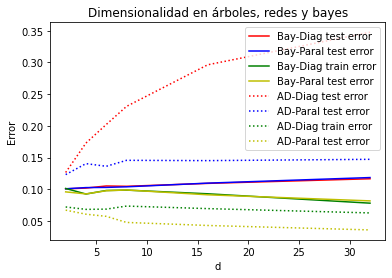

In [41]:
# Bayes
plt.plot(error_diag['d'], error_diag['Test Error'],'r', label='Bay-Diag test error')
plt.plot(error_paral['d'], error_paral['Test Error'], 'b', label='Bay-Paral test error')
plt.plot(error_diag['d'], error_diag['Train Error'], 'g', label='Bay-Diag train error')
plt.plot(error_paral['d'], error_paral['Train Error'], 'y', label='Bay-Paral test error')

# Arboles
plt.plot(ad_error_diag['d'],  ad_error_diag['Test Error'],'r',    label='AD-Diag test error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Test Error'], 'b',  label='AD-Paral test error', linestyle=":")
plt.plot(ad_error_diag['d'],  ad_error_diag['Train Error'], 'g',  label='AD-Diag train error', linestyle=":")
plt.plot(ad_error_paral['d'], ad_error_paral['Train Error'], 'y', label='AD-Paral test error', linestyle=":")

# Acá pondría mis redes... SI TAN SOLO LAS HUBIERA GUARDADO

plt.legend()
plt.xlabel('d')
plt.ylabel('Error')
plt.title("Dimensionalidad en árboles, redes y bayes")

plt.show()